# Homework 2 Part 1 - Graph Visualization

#### Austin Chan, Justin Herman, Chester Poon, Deepak Mongia, Michael O'Donnell


### Introduction

For this assignment, we analyzed the trophic biomass transfers between different organism groups in the Florida Everglades. To understand this network, it is important to cover a little bit of ecology first. Trophic biomass transfer refers to the transfer of energy between living organisms within an ecosystem. The primary source of energy for producers, like plants and algae, comes from the sun. These plants and algae use the sun's energy to produce simple sugars to grow. Primary consumers, like snails and herbivorous fish, eat the plants and algae, which results in energy transfer from the primary producers to the primary consumers. Above the primary consumers are predators, like otters and snakes, that eat the primary consumers. Above the predators are the apex predators, like alligators and bears, that eat primary consumers and other smaller predators. When organisms die and their remains are left on the ground, decomposers come in to break down the scraps and produce useful nutrients for the primary producers to use for growth, completing the food cycle.

In this (oversimplified) description of the food cycle, the transfer of energy is very linear. Producers are eaten by primary consumers, which are eaten by predators, which are eaten by apex predators, which are broken down by decomposers. In reality, trophic biomass transfer is more like a web, or a network, where many organisms feed on a variety of other organisms in varying degrees. This data shows the biomass transfer relationships between different wildlife species in the Florida Everglades. Some species that perform very similar functions, like terrestrial invertebrates (bugs), phytoplankton (water organisms that produce energy through the sun), and small herbivorous fish have been grouped together into their own group nodes. (One node for all bugs, one node for all phytoplankton, and one node for all small herbivorous fish.) This makes the analysis much less cluttered and removes a lot of the noise that can pollute the underlying patterns in the data.

All that being said, let's jump into the data.

### Loading the Necessary Packages

The first step to analyzing this network is to import the packages necessary for the analysis. The first package we imported is networkx. This package provides a comprehensive framework for loading, processing, and analyzing network data in python. The second package we used is matplotlib. This package is useful for displaying plots and figures in the python notebook. The third package we ued is pandas. This package creates a data structure called a dataframe (like the ones in R) that can be used to store multiple types of data in a tabular form (rows and columns) to make data analysis more streamlined.


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

### Loading and Viewing the Data

After loading the packages, the next step is to load the data. This data can be downloaded from networkrepository, a public use data source for network data. The primary reference for this dataset is from Bondavalli et al.'s paper "Network Analysis of Trophic Dynamics in South Florida Ecosystems, FY 96: The Cypress Wetland Ecosystem".

The link to the data download is listed here:

http://networkrepository.com/eco-everglades.php

The research paper can be found here:

https://home.nps.gov/ever/learn/nature/upload/ASS97-5FinalReport.pdf

The code below loads and displays the data. The first line opens the edge file from the repository. The second line reads the opened file using the `read_weighted_edgelist` function. The third line closes the file.

The next chunk displays the network using the `draw_spring` function from the networkx package. This function draws the network according to the spring algorithm, which groups together nodes that are tightly connected to each other and spreads the nodes that are not connected as much. The result is usually a cluster of tightly connected nodes in the middle with surrounding nodes that are weakly connected. A plot of the network can be seen below.

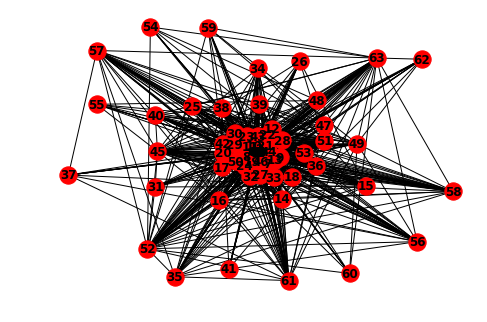

In [2]:
fh = open("eco-everglades.edges","rb")
G = nx.read_weighted_edgelist(fh)
fh.close()

nx.draw_spring(G,with_labels = True, font_weight="bold")
plt.show()

### Analysis



In [3]:
nx.diameter(G)

3

In [6]:
EVC = nx.eigenvector_centrality(G)
degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

nx.set_node_attributes(G, 'degree', degree)
nx.set_node_attributes(G, 'eigenvector', EVC)
nx.set_node_attributes(G, 'betweenness', betweenness)
nx.set_node_attributes(G, 'closeness', closeness)

EVC_df = pd.DataFrame.from_dict(EVC,orient="index")
EVC_df = EVC_df.rename(index=str, columns = {0:"Eigenvector Centrality"})
EVC_df = EVC_df.sort_values(by=["Eigenvector Centrality"], ascending = False)

EVC_df

,Eigenvector Centrality
66,0.222149
64,0.218723
69,0.215119
10,0.198790
11,0.196581
68,0.195499
52,0.190454
12,0.177953
45,0.169569
63,0.166381
